In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
 

In [405]:
data=pd.read_csv("car prices.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [407]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [408]:
data.drop("Market Category",axis=1,inplace=True)
data["Engine HP"].fillna(np.mean(data["Engine HP"]),inplace=True)
data.dropna(inplace=True)
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [409]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11875.000000,11875.000000,11875.000000,11875.000000,11875.00000,11875.000000,11875.000000,1.187500e+04
mean,2010.383916,249.503859,5.630568,3.435032,26.55040,19.622905,1557.281600,4.059028e+04
std,7.584440,108.916852,1.776512,0.881788,8.45448,8.341758,1443.351474,6.014772e+04
min,1990.000000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.00000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.00000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.226000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='MSRP', ylabel='Count'>

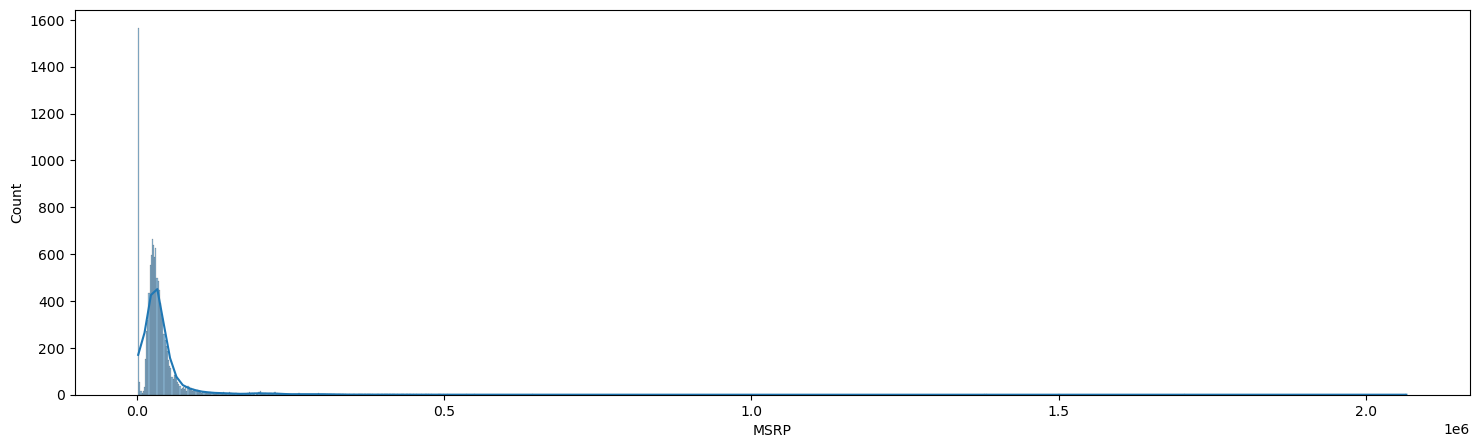

In [410]:
plt.figure(figsize=(18,5))
sns.histplot(data["MSRP"],kde=True)

#plt.hist(data["MSRP"])

<Axes: xlabel='log_price', ylabel='Count'>

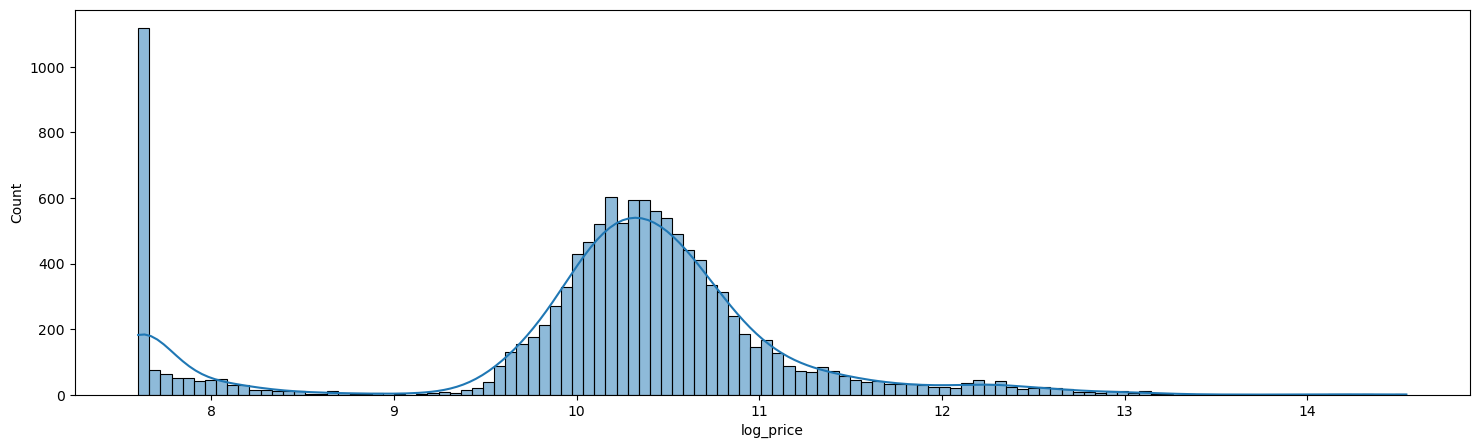

In [411]:
data["log_price"]=np.log(data["MSRP"])
plt.figure(figsize=(18,5))
sns.histplot(data["log_price"],kde=True)


<Axes: >

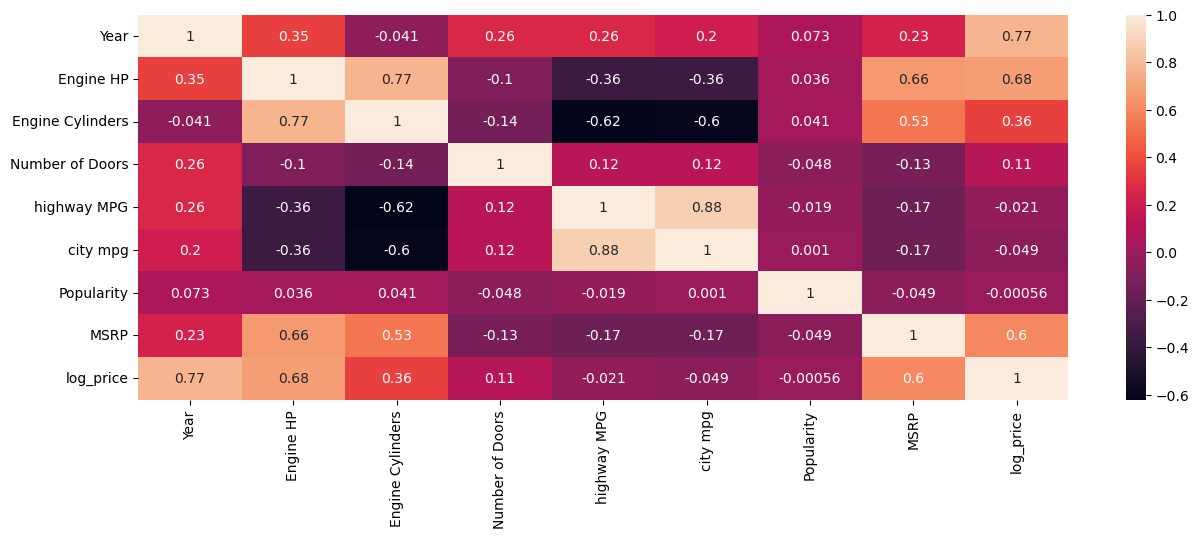

In [412]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True),annot=True)

highway mpg ,popularity and numberofdoors have no relation with MSRP or log_price so we will drop them
engine horse power have big relation with egine cylinders

In [413]:
data.drop(["highway MPG","Popularity","Number of Doors"],axis=1,inplace=True)
data.describe()

,Year,Engine HP,Engine Cylinders,city mpg,MSRP,log_price
count,11875.000000,11875.000000,11875.000000,11875.000000,1.187500e+04,11875.000000
mean,2010.383916,249.503859,5.630568,19.622905,4.059028e+04,10.112797
std,7.584440,108.916852,1.776512,8.341758,6.014772e+04,1.106903
min,1990.000000,55.000000,0.000000,7.000000,2.000000e+03,7.600902
25%,2007.000000,170.000000,4.000000,16.000000,2.099500e+04,9.952040
50%,2015.000000,227.000000,6.000000,18.000000,2.999500e+04,10.308786
75%,2016.000000,300.000000,6.000000,22.000000,4.226000e+04,10.651596
max,2017.000000,1001.000000,16.000000,137.000000,2.065902e+06,14.541077


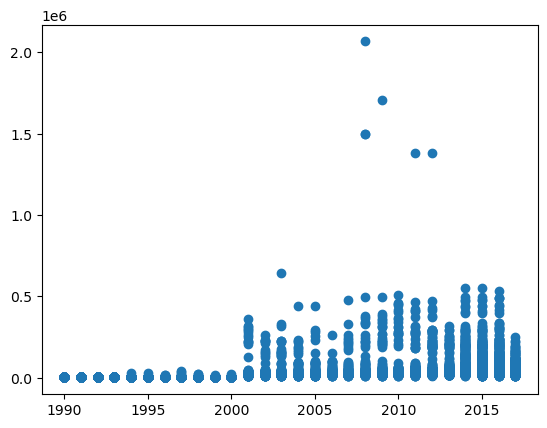

In [414]:
plt.scatter(data["Year"],data["MSRP"])

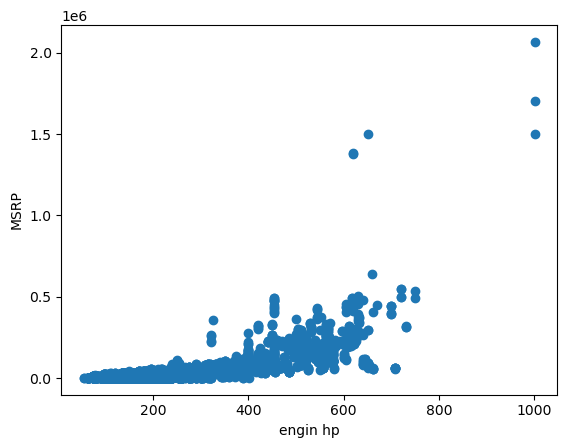

In [415]:
plt.xlabel("engin hp")
plt.ylabel("MSRP")
plt.scatter(data["Engine HP"],data["MSRP"])

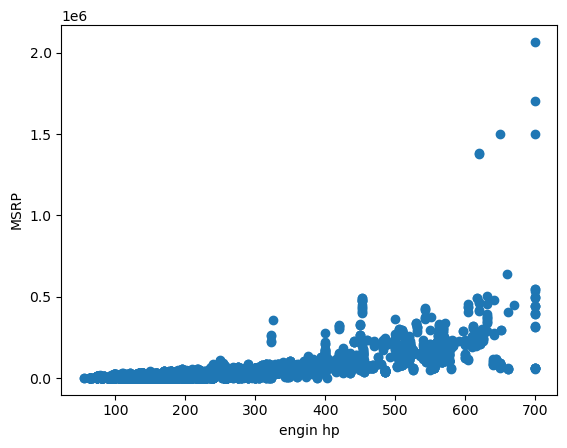

In [416]:
plt.xlabel("engin hp")
plt.ylabel("MSRP")
data["Engine HP"]=np.where(data["Engine HP"]>700,700,data["Engine HP"])
plt.scatter(data["Engine HP"],data["MSRP"])

Engine Cylinders
0.0       51
3.0       30
4.0     4752
5.0      225
6.0     4486
8.0     2031
10.0      68
12.0     229
16.0       3
Name: count, dtype: int64

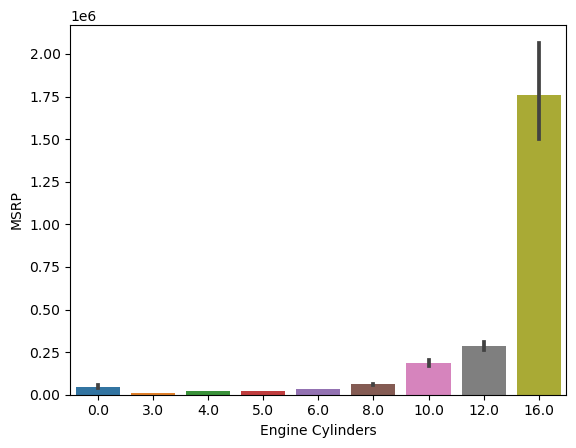

In [417]:
sns.barplot(x=data["Engine Cylinders"],y=data["MSRP"])
data["Engine Cylinders"].value_counts().sort_index()

C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\1004826388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Engine Cylinders"]=np.where(data["Engine Cylinders"]==16,12,data["Engine Cylinders"])
C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\1004826388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Engine Cylinders"]=np.where(data["Engine Cylinders"].isin([5,3]),4,data["Engine Cylinders"])
C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\1004826388.py:4: S

<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

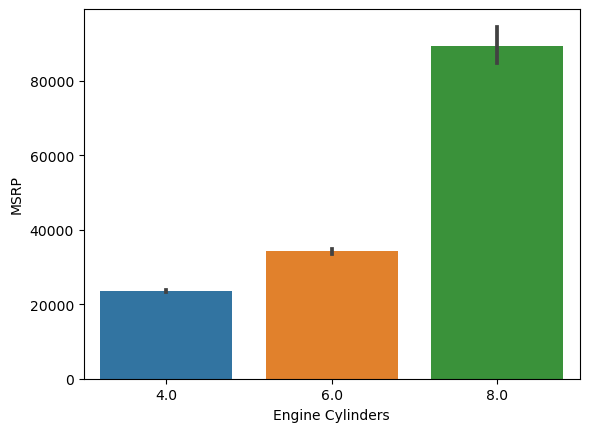

In [418]:
data=data[data["Engine Cylinders"]!=0]
data["Engine Cylinders"]=np.where(data["Engine Cylinders"]==16,12,data["Engine Cylinders"])
data["Engine Cylinders"]=np.where(data["Engine Cylinders"].isin([5,3]),4,data["Engine Cylinders"])
data["Engine Cylinders"]=np.where(data["Engine Cylinders"].isin([10,12]),8,data["Engine Cylinders"])


sns.barplot(x=data["Engine Cylinders"],y=data["MSRP"])


In [419]:
data.describe()

,Year,Engine HP,Engine Cylinders,city mpg,MSRP,log_price
count,11824.000000,11824.000000,11824.000000,11824.000000,1.182400e+04,11824.000000
mean,2010.363075,249.502085,5.547361,19.222344,4.056163e+04,10.110448
std,7.593831,108.571907,1.509212,5.577732,6.025510e+04,1.108337
min,1990.000000,55.000000,4.000000,7.000000,2.000000e+03,7.600902
25%,2007.000000,170.000000,4.000000,16.000000,2.099500e+04,9.952040
50%,2015.000000,227.000000,6.000000,18.000000,2.998000e+04,10.308286
75%,2016.000000,300.000000,6.000000,22.000000,4.220000e+04,10.650176
max,2017.000000,700.000000,8.000000,58.000000,2.065902e+06,14.541077


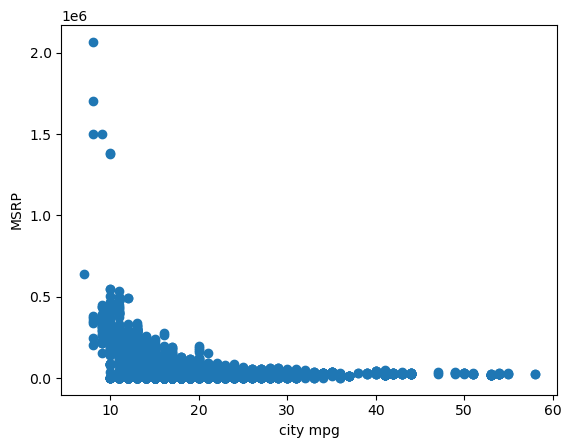

In [420]:
plt.xlabel("city mpg")
plt.ylabel("MSRP")
plt.scatter(data["city mpg"],data["MSRP"])


In [421]:
data.describe(include=object)


,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11824,11824,11824,11824,11824,11824,11824
unique,47,901,9,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1115,156,7169,8256,4743,4699,3027


In [422]:
data.drop("Model",axis=1,inplace=True)


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\3679958248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Model",axis=1,inplace=True)


Engine Fuel Type
regular unleaded                                7169
premium unleaded (required)                     1991
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

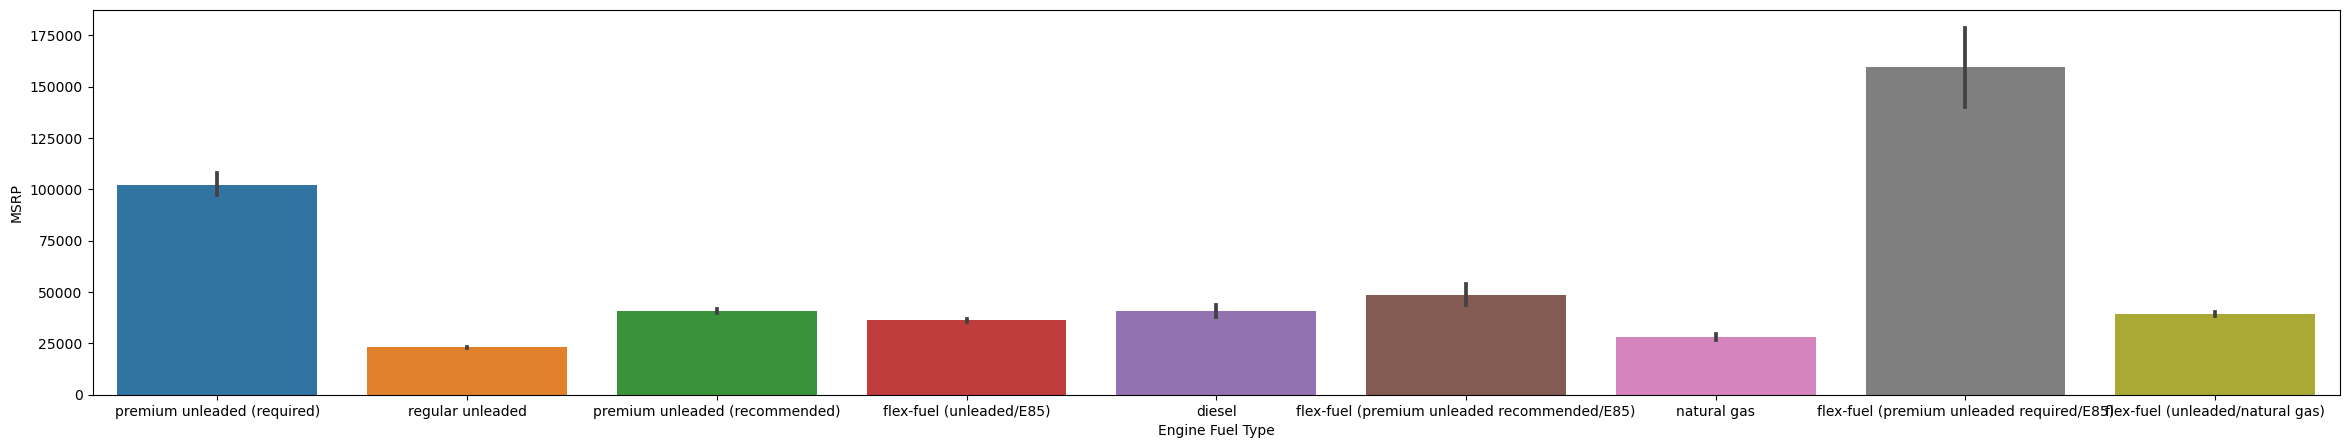

In [423]:
plt.figure(figsize=(29,5))
sns.barplot(x=data["Engine Fuel Type"],y=data["MSRP"])
data["Engine Fuel Type"].value_counts()

C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\4211592379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Engine Fuel Type"] = np.where(data["Engine Fuel Type"] == "premium unleaded (required)", "premium unleaded (required)", "Other")


Engine Fuel Type
Other                          9833
premium unleaded (required)    1991
Name: count, dtype: int64

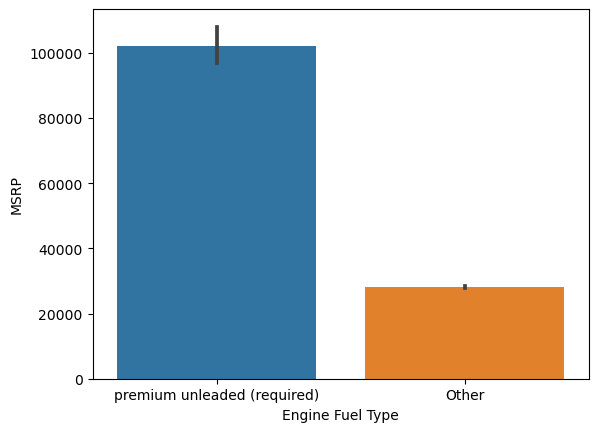

In [424]:
data["Engine Fuel Type"] = np.where(data["Engine Fuel Type"] == "premium unleaded (required)", "premium unleaded (required)", "Other")
sns.barplot(x=data["Engine Fuel Type"],y=data["MSRP"])
data["Engine Fuel Type"].value_counts()

Transmission Type
AUTOMATIC           8256
MANUAL              2922
AUTOMATED_MANUAL     625
UNKNOWN               19
DIRECT_DRIVE           2
Name: count, dtype: int64

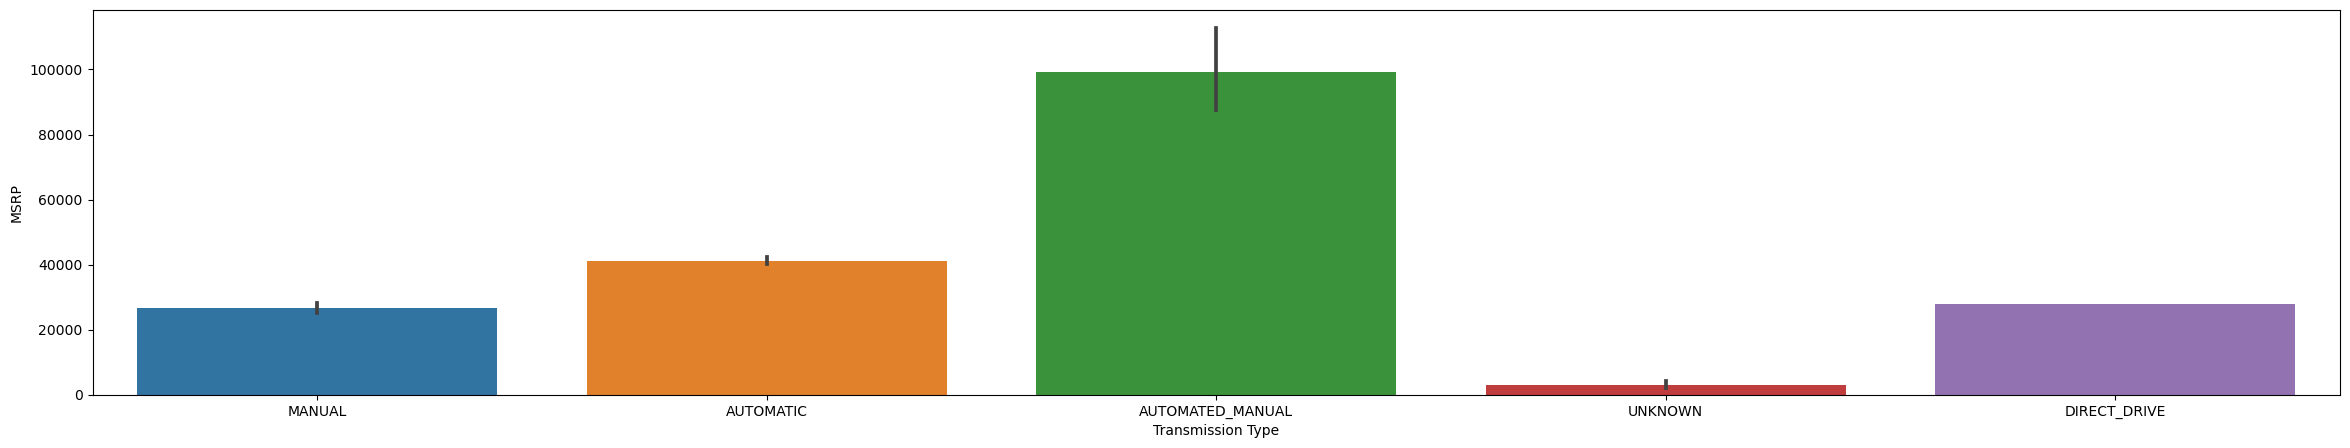

In [425]:
plt.figure(figsize=(29,5))
sns.barplot(x=data["Transmission Type"],y=data["MSRP"])
data["Transmission Type"].value_counts()

C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_23228\3038114305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Transmission Type"]=np.where(data["Transmission Type"].isin(["MANUAL","UNKNOWN","DIRECT_DRIVE"]),"new manual",data["Transmission Type"])


Transmission Type
AUTOMATIC           8256
new manual          2943
AUTOMATED_MANUAL     625
Name: count, dtype: int64

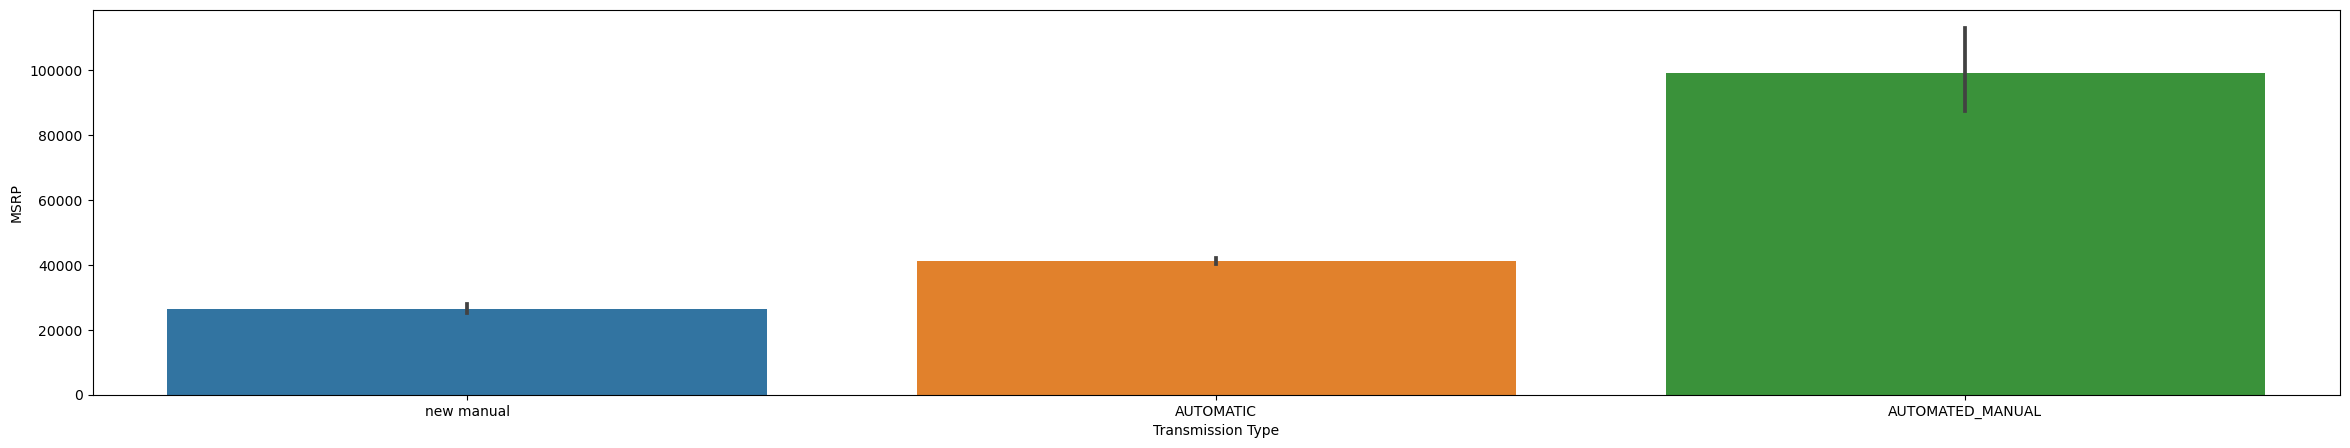

In [426]:
data["Transmission Type"]=np.where(data["Transmission Type"].isin(["MANUAL","UNKNOWN","DIRECT_DRIVE"]),"new manual",data["Transmission Type"])
plt.figure(figsize=(29,5))
sns.barplot(x=data["Transmission Type"],y=data["MSRP"])
data["Transmission Type"].value_counts()

In [427]:
data.describe(include=object)

,Make,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11824,11824,11824,11824,11824,11824
unique,47,2,3,4,3,16
top,Chevrolet,Other,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1115,9833,8256,4743,4699,3027


In [428]:
data.head()
X=data.drop(["MSRP","log_price"],axis=1)
X = pd.get_dummies(data = X, columns=["Vehicle Size","Driven_Wheels","Transmission Type","Engine Fuel Type","Vehicle Style","Make"])
y=data["log_price"]

X_train,X_test,y_train,y_test=train_test_split(X,y)


In [429]:
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8564519859501641
0.8479259695463063


In [430]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
model.fit(X_train_scaled,y_train)
X_test_scaled=scalar.transform(X_test)
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))



0.8564517703030934
0.8479370009217263
